# SEN437 - Machine Learning

## Server Log Analysis in a Jupyter Notebook

#### Prepared by Banu Elmas B1405.090012 and İlayda Büyükakova B1405.090024

QUESTION:Using the web server logs, 

1. Which is the most frequent site that is required to use in this server? 
2. What is the model that we can fit (linear regression) for this model when we use avarage frequency per hours (in different days) for the most required site? 
3. When you point the data, is it linear?


4. What is the rush hours fort his server? 
5. This time x is hours in a day and y are avarage usage per hours (in different days). What is the model that we can fit (linear regression) for this model?
6. When you point the data, is it linear?

Can we use different time series algorithm to predict the most frequent site or rush hour?
Write the neccessary codes that solve this problem; use python
DATA: https://www.kaggle.com/shawon10/web-log-dataset#webLog.csv

Dead Line: 06:11:2019

In [466]:
#needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [467]:
data = pd.read_csv("weblog.csv")
data.shape

(15812, 4)

In [468]:
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [469]:
data.dtypes

IP       object
Time     object
URL      object
Staus    object
dtype: object

In [470]:
data.describe()

,IP,Time,URL,Staus
count,15812,15812,15812,15812
unique,8,7300,299,7
top,10.128.2.1,16/Nov/2017:15:51:03,GET /login.php HTTP/1.1,200
freq,4257,44,3284,11330


In [471]:
data.isnull().sum()

IP       0
Time     0
URL      0
Staus    0
dtype: int64

## Question 1: Which is the most frequent site that is required to use in this server? 



Text(0.5, 1.0, 'Most Popular Requests by the Users')

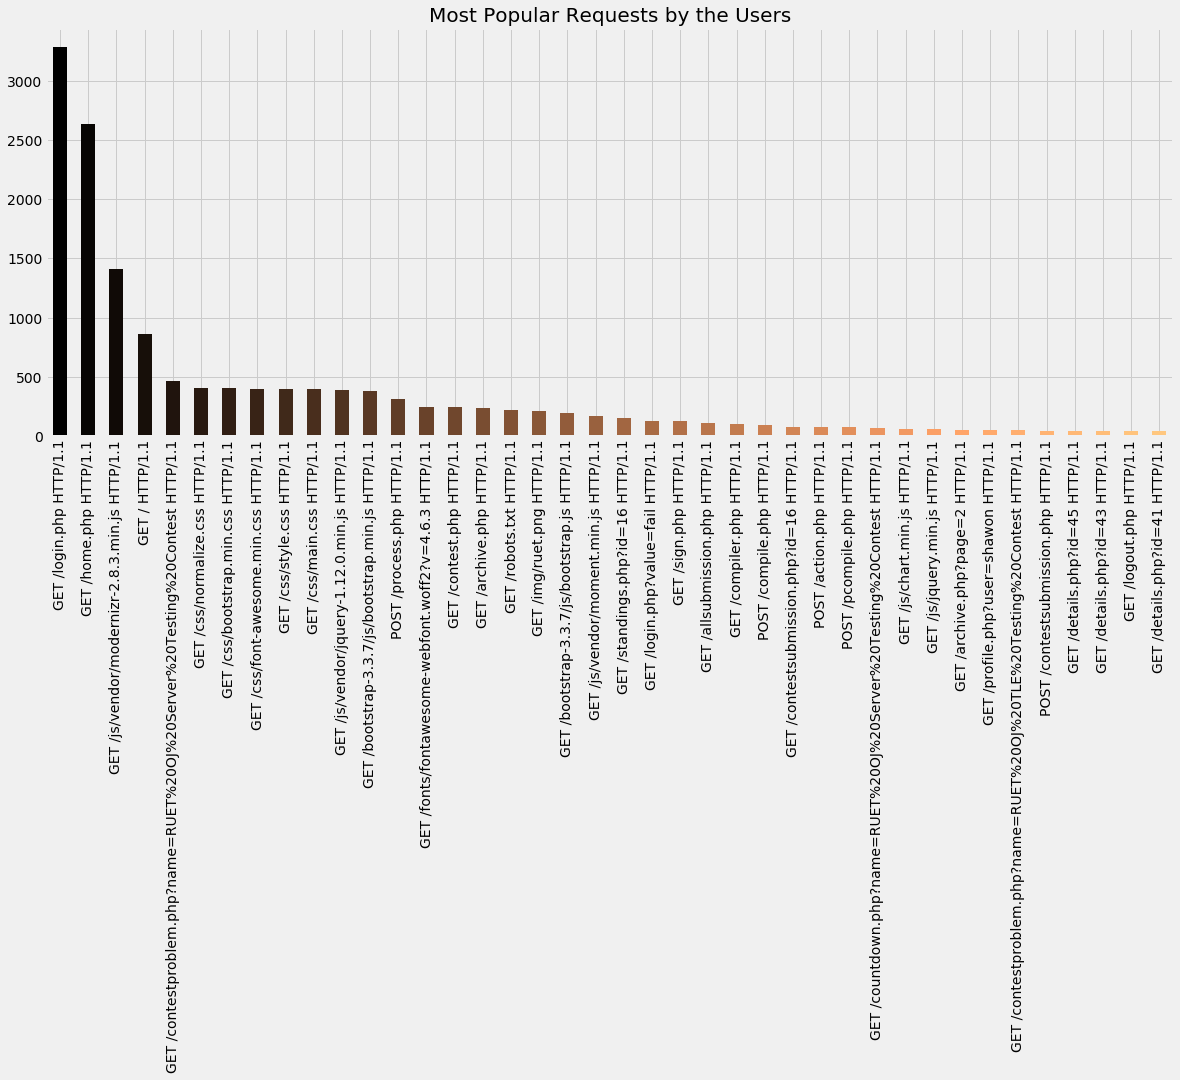

In [472]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['URL'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Requests by the Users', fontsize = 20)

In [473]:
data['Time'] = data['Time'].str.split(n = 1, expand = True)

data['Time']

0        29/Nov/2017:06:58:55
1        29/Nov/2017:06:59:02
2        29/Nov/2017:06:59:03
3        29/Nov/2017:06:59:04
4        29/Nov/2017:06:59:06
                 ...         
15807    02/Mar/2018:15:47:12
15808    02/Mar/2018:15:47:23
15809    02/Mar/2018:15:47:32
15810    02/Mar/2018:15:47:35
15811    02/Mar/2018:15:47:46
Name: Time, Length: 15812, dtype: object

In [474]:
data['Time'] = pd.to_datetime(data['Time'], errors='coerce', format='%d/%b/%Y:%H:%M:%S')
data['day'] = data['Time'].dt.day
data['month'] = data['Time'].dt.month
data['year'] = data['Time'].dt.year
data['hour'] = data['Time'].dt.hour
data['minute'] = data['Time'].dt.minute
data['second'] = data['Time'].dt.second

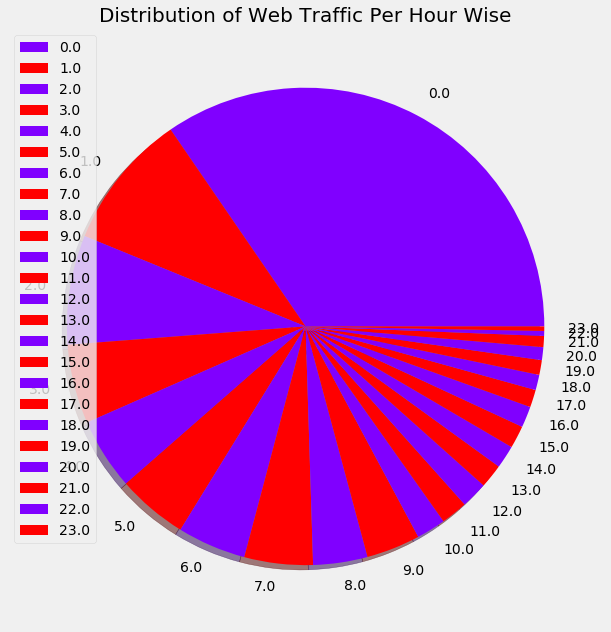

In [475]:
size = data['hour'].value_counts()
color = plt.cm.rainbow(np.linspace(0, 1, 2,3))
labels = "0.0", "1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","9.0","10.0","11.0","12.0","13.0","14.0","15.0","16.0","17.0","18.0","19.0","20.0","21.0","22.0","23.0"
explode = [0, 0.1,0.2,0.3]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = color, labels = labels, explode = None, shadow = True)
plt.title('Distribution of Web Traffic Per Hour Wise', fontsize = 20)
plt.tight_layout()
plt.legend()
plt.show()